# 1
Escolha um conjunto de dados e realize uma análise exploratória de dados (EDA).

Lembre-se de:

- verificar os dados
- realizar a limpeza de dados nulos
- utilizar plots para entender os dados
- tentar tirar "pequenas conclusões" dos dados

Algumas fontes de conjunto de dados: 

- [UCI Repository](https://archive.ics.uci.edu/ml/index.php)
- [Scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html)
- [Seaborn](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)
- [Kaggle](https://www.kaggle.com/datasets)

Alguns conjuntos de dados interessantes são:

- [Iris](https://www.kaggle.com/datasets/uciml/iris)
- [Titanic](https://www.kaggle.com/competitions/titanic/data?select=train.csv)
- [Palmer Penguins](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)
- [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)
- [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)
- [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)
- [Drug Classification](https://www.kaggle.com/datasets/prathamtripathi/drug-classification)


## Importanto os Dados

In [22]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Levy\Downloads\Dados\StudentsPerformance.csv', encoding='utf-8')

In [23]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


### Legenda
* Gender: é o gênero dos alunos;
* Race/ethnicity: é a etnia dos alunos e segue a seguinte lógica:
```
Grupo A - Branco - Britânico
Grupo B - Branco - Irlandês
Grupo C - Branco - Qualquer outro Fundo Branco
Grupo D - Misto - Branco e Negro Caribenho
Grupo E - Misto - Branco e Negro Africano
Grupo F - Misto - Branco e Asiático
Grupo G - Misto - Qualquer outro fundo misto
```
* Parental level of education: nível de educação de um dos reponsáveis pelo aluno;
* Lunch: refere-se a quantidade do lanche do alunos;
* Test preparation course: refere-se ao fato de o aluno ter ou não ter feito um curso preparatório;

As colunas restantes mostram os resultados dos alunos nas diciplinas de matemática, leitura e escrita respectivamente

**Importante dizer que estes dados são fictícios e não retratam a realidade**



## Limpeza e Adequações nos Dados

In [24]:
# Verificando se há presença de dados nulos no DF
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

As colunas **gender**, **parental level of education**, **lunch** e **test preparation course** devem passar por um processo de Label Enconder para que se verifique sua correlação com as demais colunas.

In [32]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['parental level of education'] = label_encoder.fit_transform(df['parental level of education'])
df['lunch'] = label_encoder.fit_transform(df['lunch'])
df['test preparation course'] = label_encoder.fit_transform(df['test preparation course'])
df['gender'] = label_encoder.fit_transform(df['gender'])


df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


 Visando explorar a eficácia de modelos que considerem a coluna race/ethnicity como um dado ordinal ou como um dado categórico, um novo df será criado e passará por um processo de hot-encoder enquanto o que restou passará por um label-encoder

In [33]:
# Novo df
df2 = df

##### Label Encoder

In [34]:
# Label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['race/ethnicity'] = label_encoder.fit_transform(df['race/ethnicity'])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


##### Hot Encoder

In [35]:
# Hot encoder
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(df2['race/ethnicity'].values.reshape(-1,1)).toarray()
X.shape # 5 novas colunas

(1000, 5)

In [36]:
dfOneHot = pd.DataFrame(X, columns = ['race/ethnicity_' + str((i)) for i in range(X.shape[1])])
df2 = pd.concat([df2, dfOneHot], axis=1)
df2.drop(['race/ethnicity'], axis =1, inplace=True)
df2.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_0,race/ethnicity_1,race/ethnicity_2,race/ethnicity_3,race/ethnicity_4
0,0,1,1,1,72,72,74,0.0,1.0,0.0,0.0,0.0
1,0,4,1,0,69,90,88,0.0,0.0,1.0,0.0,0.0
2,0,3,1,1,90,95,93,0.0,1.0,0.0,0.0,0.0
3,1,0,0,1,47,57,44,1.0,0.0,0.0,0.0,0.0
4,1,4,1,1,76,78,75,0.0,0.0,1.0,0.0,0.0


## Verificando correlações

<Axes: >

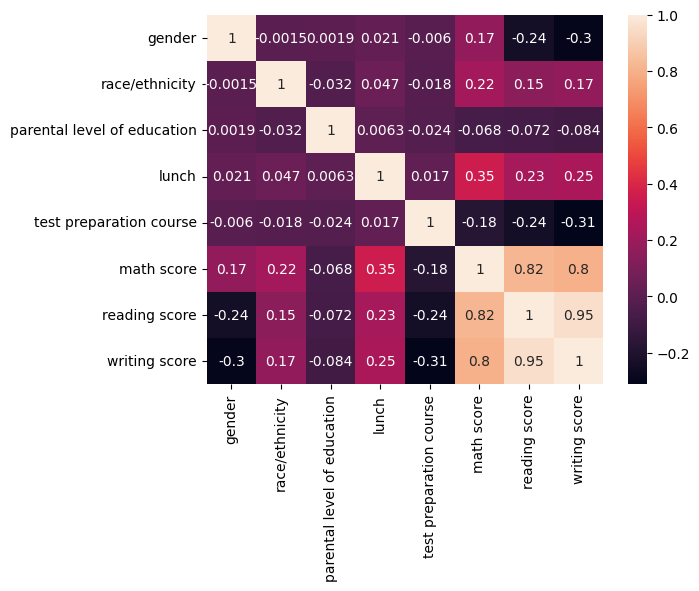

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True)

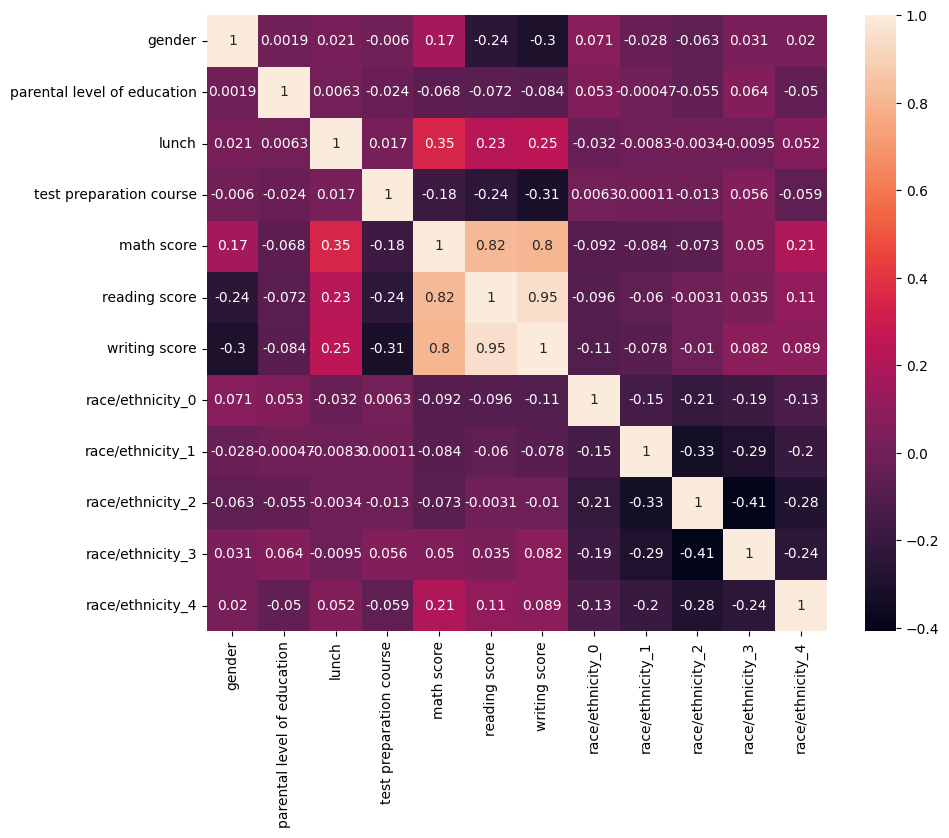

In [38]:
plt.figure(figsize=(10, 8))

# Cria o heatmap
sns.heatmap(df2.corr(), annot=True)

# Mostra o gráfico
plt.show()